# Answer 1

In [17]:
import pandas as pd

url_first="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users= pd.read_csv(url_first,sep=("|"))
print(users)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Mean Age per occupation")
users.groupby("occupation")["age"].mean()



     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mean Age per occupation


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [37]:
#5
#Reference : https://stackoverflow.com/questions/51010770/how-to-find-the-ratio-in-a-pandas-series-for-a-groupby-function

mratio = users.pivot_table(index="occupation", columns="gender" , aggfunc="size", fill_value=0)
Sum=mratio[["F","M"]].sum(axis=1)
mratio["Male Ratio"]=round(100*mratio["M"]/Sum)
print(mratio.sort_values(by=["Male Ratio"], ascending=False))


gender          F    M  Male Ratio
occupation                        
doctor          0    7       100.0
engineer        2   65        97.0
technician      1   26        96.0
retired         1   13        93.0
executive       3   29        91.0
programmer      6   60        91.0
scientist       3   28        90.0
entertainment   2   16        89.0
lawyer          2   10        83.0
salesman        3    9        75.0
educator       26   69        73.0
student        60  136        69.0
other          36   69        66.0
marketing      10   16        62.0
writer         19   26        58.0
none            4    5        56.0
administrator  36   43        54.0
artist         13   15        54.0
librarian      29   22        43.0
healthcare     11    5        31.0
homemaker       6    1        14.0


In [46]:
#6 Calculate MInimum and Maximum ages
print("Minimun and Maximum ages")
print(users.groupby("occupation")["age"].agg(["min","max"]))

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Mean of Age")

#7 Grouping by Occupation and Sex and calculate the mean of age
print(users.groupby(["occupation","gender"])["age"].mean())


Minimun and Maximum ages
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mean of Age
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F  

# Answer 2


In [50]:
import pandas as pd

url_second="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12= pd.read_csv(url_second,sep=(","))
print(euro12)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [59]:
#4 Select the GOal Column
print(euro12["Goals"])

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#5
print("Total Teams Participation in Euro 2012")

print(euro12["Team"].count())

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#6
print("Total Number of Columns in Dataset")

Column_count=len(euro12.columns)
print(Column_count)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total Teams Participation in Euro 2012
16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Total Number of Columns in Dataset
35


In [68]:
#7
discipline=euro12[["Team","Yellow Cards","Red Cards"]]
print(discipline)
#8
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Sorting the teams to red cards and yellow cards")
discipline.sort_values(by=["Red Cards","Yellow Cards"],ascending= False)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sorting the teams to red cards and yellow cards


,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [78]:
#9 Mean of yellow cards given per team
Mean_yellow=euro12.groupby(["Team"])["Yellow Cards"].mean()
print(Mean_yellow)


Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [79]:
#10 Teams Scored more than 6 goals
euro12[euro12["Goals"]>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [84]:
#11 Teams that start with G
euro12[euro12["Team"].str.contains("G")]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [89]:
#12 Select first 7 columns
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [94]:
#13 All Columns except Last 3
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [95]:
#14 Presenting the shooting accuracy
country_names = euro12[euro12.Team.isin(["England","Italy","Russia"])]
country_names[["Team", "Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Answer 3

In [106]:
import pandas as pd
import numpy as np

first_series = pd.Series(np.random.randint(1, 5, size=100))
print(first_series)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Second_series = pd.Series(np.random.randint(1, 4, size=100))
print(Second_series)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
third_series = pd.Series(np.random.randint(10000, 30001, size=100))
print(third_series)

0     4
1     4
2     4
3     3
4     4
     ..
95    1
96    3
97    4
98    2
99    3
Length: 100, dtype: int32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0     2
1     2
2     3
3     1
4     2
     ..
95    2
96    3
97    2
98    2
99    1
Length: 100, dtype: int32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0     28234
1     25878
2     26389
3     21362
4     16046
      ...  
95    29775
96    18116
97    19985
98    28927
99    10422
Length: 100, dtype: int32


In [113]:
#3 Dataframe creation series by column

df = pd.DataFrame({"first_series":first_series,"Second_series":Second_series,"third_series":third_series})
print(df)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#5
print("Rename Columns Name ")

Renames = df.rename(columns={"first_series":"bedrs","Second_series":"bathrs","third_series":"price_sqr_meter"})
print(Renames)

    first_series  Second_series  third_series
0              4              2         28234
1              4              2         25878
2              4              3         26389
3              3              1         21362
4              4              2         16046
..           ...            ...           ...
95             1              2         29775
96             3              3         18116
97             4              2         19985
98             2              2         28927
99             3              1         10422

[100 rows x 3 columns]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rename Columns Name 
    bedrs  bathrs  price_sqr_meter
0       4       2            28234
1       4       2            25878
2       4       3            26389
3       3       1            21362
4       4       2            16046
..    ...     ...              ...
95      1       2            29775
96      3       3            18116
97      4       2      

In [138]:
#5 Assigned Values to bigcolumn
# Reference : Tushar Jain

bigcolumn = pd.concat([first_series,Second_series,third_series])
bigcolumn = bigcolumn.to_frame()

print(bigcolumn)

        0
0       4
1       4
2       4
3       3
4       4
..    ...
95  29775
96  18116
97  19985
98  28927
99  10422

[300 rows x 1 columns]


In [142]:
#6 Checking the index going till 99

if (max(bigcolumn.index)==99):
    print('Yes')
else:
    print('No')


Yes


In [143]:
#7 Reindexing the dataframe so it goes from 0 to 299
#https://cmdlinetips.com/2018/04/how-to-reset-index-in-pandas-dataframe/Reference : https://cmdlinetips.com/2018/04/how-to-reset-index-in-pandas-dataframe/


bigcolumn.reset_index(drop=True)


,0
0,4
1,4
2,4
3,3
4,4
...,...
295,29775
296,18116
297,19985
298,28927


# Answer 4

# Answer 5

In [162]:
import pandas as ad
import numpy as np

chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t") #\t is for tab space
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [191]:
#5 Number of Observation in the dataset
obv=chipo.shape[0]
print(obv)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

#6 Total number of Columns in the dataset
col=chipo.shape[1]
print(col)

#7 Print names of the columns
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
cname=chipo.columns
print(cname)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#8 Dataset indexing
indexing=chipo.index
print(indexing)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
#9 Most ordered Items list
order_list=chipo['item_name'].value_counts()
print(order_list)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

#10 For the most-ordered item, how many items were ordered?
print("For the most-ordered item, how many items were ordered?")
print(order_list[0])

4622
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
RangeIndex(start=0, stop=4622, step=1)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito  

In [204]:
#11 Most ordered item in choice description column
cd = chipo["choice_description"].value_counts()
print(cd)


[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

In [205]:
#12 Total items ordered
print("Total items ordered")
total_items = chipo['quantity'].sum()
print(total_items)

Total items ordered
4972


# Answer 6

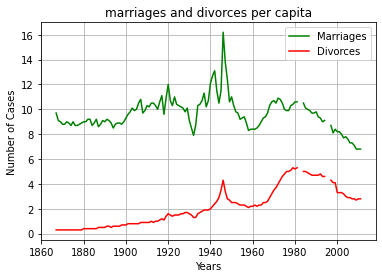

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Marriage_data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

plt.plot(Marriage_data["Year"],Marriage_data["Marriages_per_1000"], color="Green", label="Marriages")
plt.plot(Marriage_data["Year"],Marriage_data["Divorces_per_1000"], color="Red", label="Divorces")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.title("marriages and divorces per capita")
plt.grid(True)
plt.legend()

# Answer 7

Text(0.5, 1.0, 'US Marriages and Divorces in between 1900,1950 and 2000')

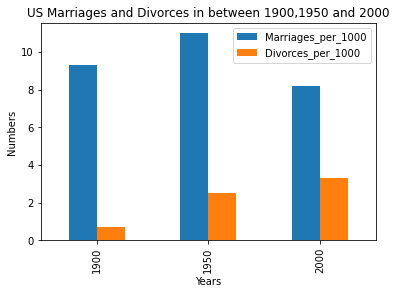

In [221]:
# Reference : https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Marriage_data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

new_data = Marriage_data[(Marriage_data.Year==1900) | (Marriage_data.Year==1950) | (Marriage_data.Year==2000)]
new_data = new_data.drop(columns = ["Marriages" , "Divorces", "Population"])
new_data = new_data.set_index("Year")
new_data.plot.bar()
plt.xlabel("Years")
plt.ylabel("Numbers")
plt.title("US Marriages and Divorces in between 1900,1950 and 2000")




# Answer 8

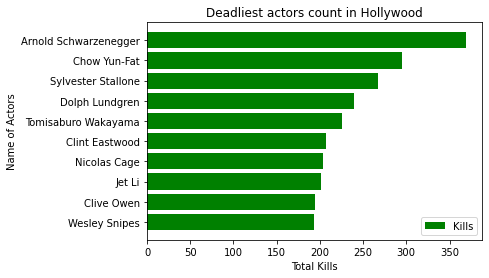

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kill_data = pd.read_csv("actor_kill_counts.csv")
kill_data = kill_data.sort_values(by="Count")

plt.barh(kill_data["Actor"], kill_data["Count"], color= "Green" , label="Kills")   #barh stands for horizontal bar chart
plt.xlabel("Total Kills")
plt.ylabel("Name of Actors")
plt.title("Deadliest actors count in Hollywood")
plt.legend()

# Answer 9

Text(0.5, 1.0, 'fraction of all Roman Emperors that were assassinated')

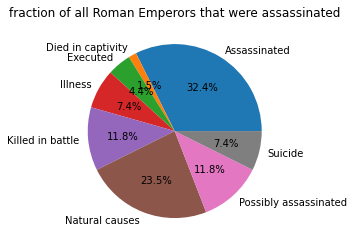

In [242]:
# Reference : https://www.w3schools.com/python/matplotlib_pie_charts.asp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

roman_data = pd.read_csv("roman-emperor-reigns.csv")

size = roman_data.groupby("Cause_of_Death").count()[["Emperor"]]

series = pd.Series(size["Emperor"])
mylabels=pd.Series(size.index)

plt.pie(series, labels= mylabels ,autopct='%1.1f%%')
plt.title("fraction of all Roman Emperors that were assassinated")



# Answer 10

Text(0.5, 1.0, 'The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009')

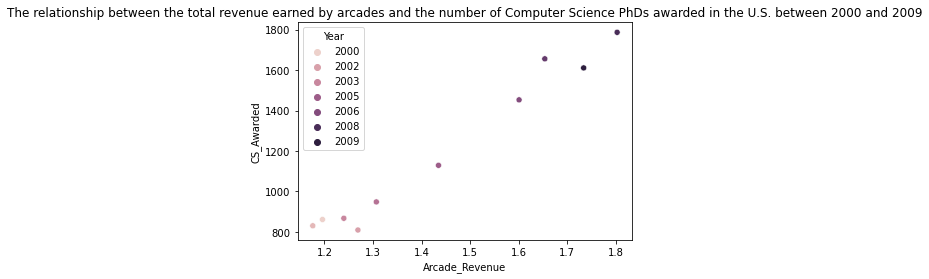

In [230]:
import seaborn as sb

doc_data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
doc_data = doc_data.rename(columns={"Total Arcade Revenue (billions)":"Arcade_Revenue","Computer Science Doctorates Awarded (US)":"CS_Awarded"})

chart =sb.scatterplot(x="Arcade_Revenue",y="CS_Awarded", hue="Year", data=doc_data)
chart.set_title("The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009")